In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
G = nx.erdos_renyi_graph(2000, 0.005)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1903
Number of deinfluenced nodes: 0
Number of susceptible nodes: 97
influencer {128, 133, 1418, 12, 524, 1043, 1303, 537, 292, 1061, 1065, 1455, 819, 436, 1331, 1718, 1078, 1336, 1210, 1339, 1854, 448, 1217, 1731, 965, 968, 1993, 1866, 1998, 1238, 1750, 600, 857, 1113, 1117, 989, 1505, 99, 1381, 1767, 1897, 1516, 110, 241, 753, 757, 1274, 251, 1404, 126}


In [4]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget_naive(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': {557}}), (2, {'Random': set(), 'High Degree': set(), 'Low Degree': {557, 1102}}), (3, {'Random': set(), 'High Degree': set(), 'Low Degree': {557, 1102}}), (4, {'Random': {860}, 'High Degree': set(), 'Low Degree': {754, 557, 1102}}), (5, {'Random': {1569}, 'High Degree': set(), 'Low Degree': {754, 557, 1102, 783}}), (6, {'Random': {184}, 'High Degree': {920}, 'Low Degree': {754, 557, 1102, 783}}), (7, {'Random': {1042, 1282}, 'High Degree': {920}, 'Low Degree': {557, 1102, 783, 754, 948}}), (8, {'Random': {816, 1888}, 'High Degree': {920}, 'Low Degree': {108, 557, 1102, 783, 754, 948}}), (9, {'Random': {1296, 1703, 271}, 'High Degree': {920}, 'Low Degree': {108, 557, 1102, 783, 754, 948}}), (10, {'Random': {1128, 1207, 1151}, 'High Degree': {920, 428}, 'Low Degree': {108, 557, 1102, 783, 172, 754, 948}}), (11, {'Random': {240, 696, 703}, 'High Degree': {920, 428}, 'Low Degree': {108, 557, 1102, 783, 172, 754, 948}}), (12, {'Rand

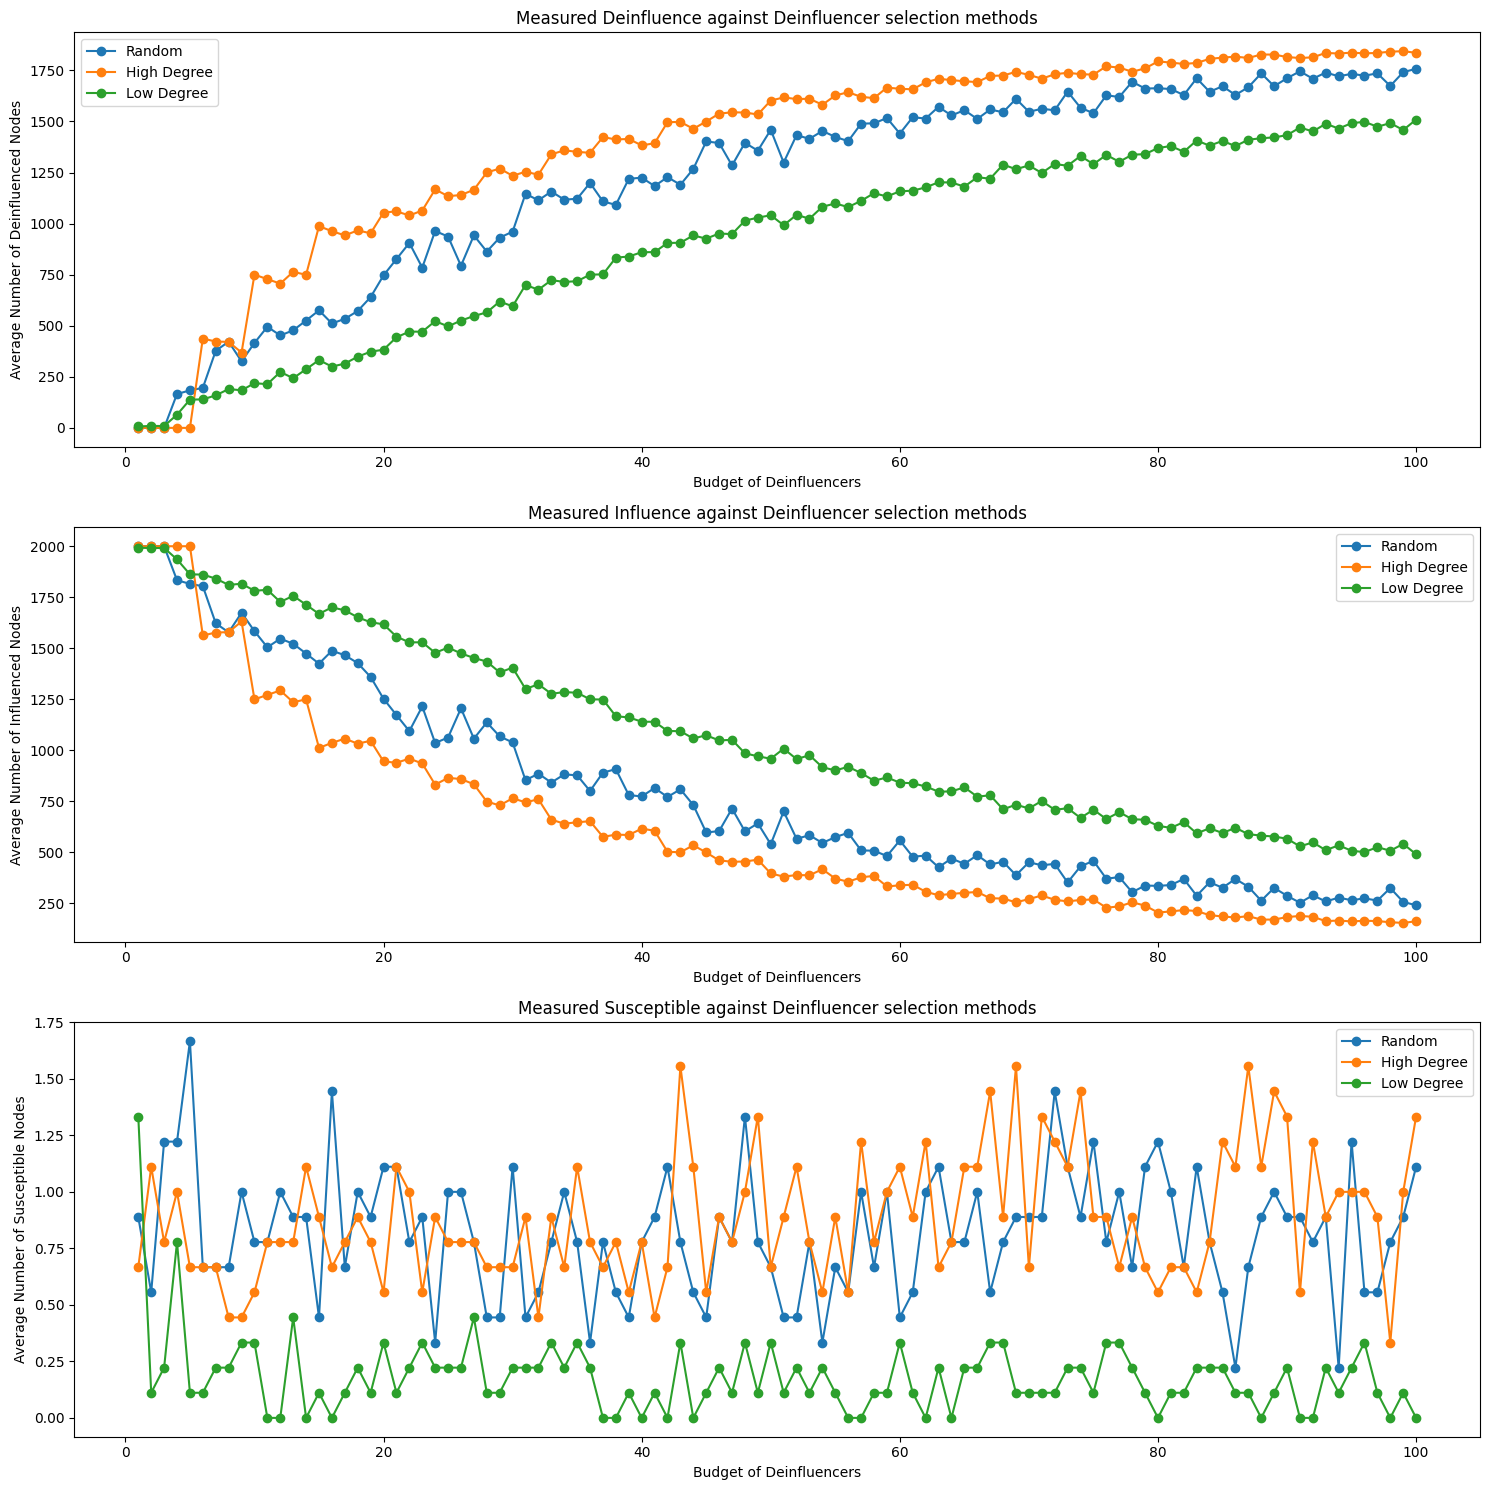

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget_naive(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': {557}}), (2, {'Random': set(), 'High Degree': set(), 'Low Degree': {557, 1102}}), (3, {'Random': set(), 'High Degree': set(), 'Low Degree': {557, 1102}}), (4, {'Random': set(), 'High Degree': set(), 'Low Degree': {754, 557, 1102}}), (5, {'Random': {1441}, 'High Degree': set(), 'Low Degree': {754, 557, 1102}}), (6, {'Random': set(), 'High Degree': set(), 'Low Degree': {754, 557, 1102, 783}}), (7, {'Random': set(), 'High Degree': set(), 'Low Degree': {754, 557, 1102, 783}}), (8, {'Random': set(), 'High Degree': set(), 'Low Degree': {557, 1102, 783, 754, 948}}), (9, {'Random': {1608}, 'High Degree': set(), 'Low Degree': {557, 1102, 783, 754, 948}}), (10, {'Random': {1938}, 'High Degree': set(), 'Low Degree': {557, 1102, 783, 754, 948}}), (11, {'Random': set(), 'High Degree': set(), 'Low Degree': {108, 557, 1102, 783, 754, 948}}), (12, {'Random': {1928}, 'High Degree': set(), 'Low Degree': {108, 557, 1102, 783, 754, 948}}), (13, {'

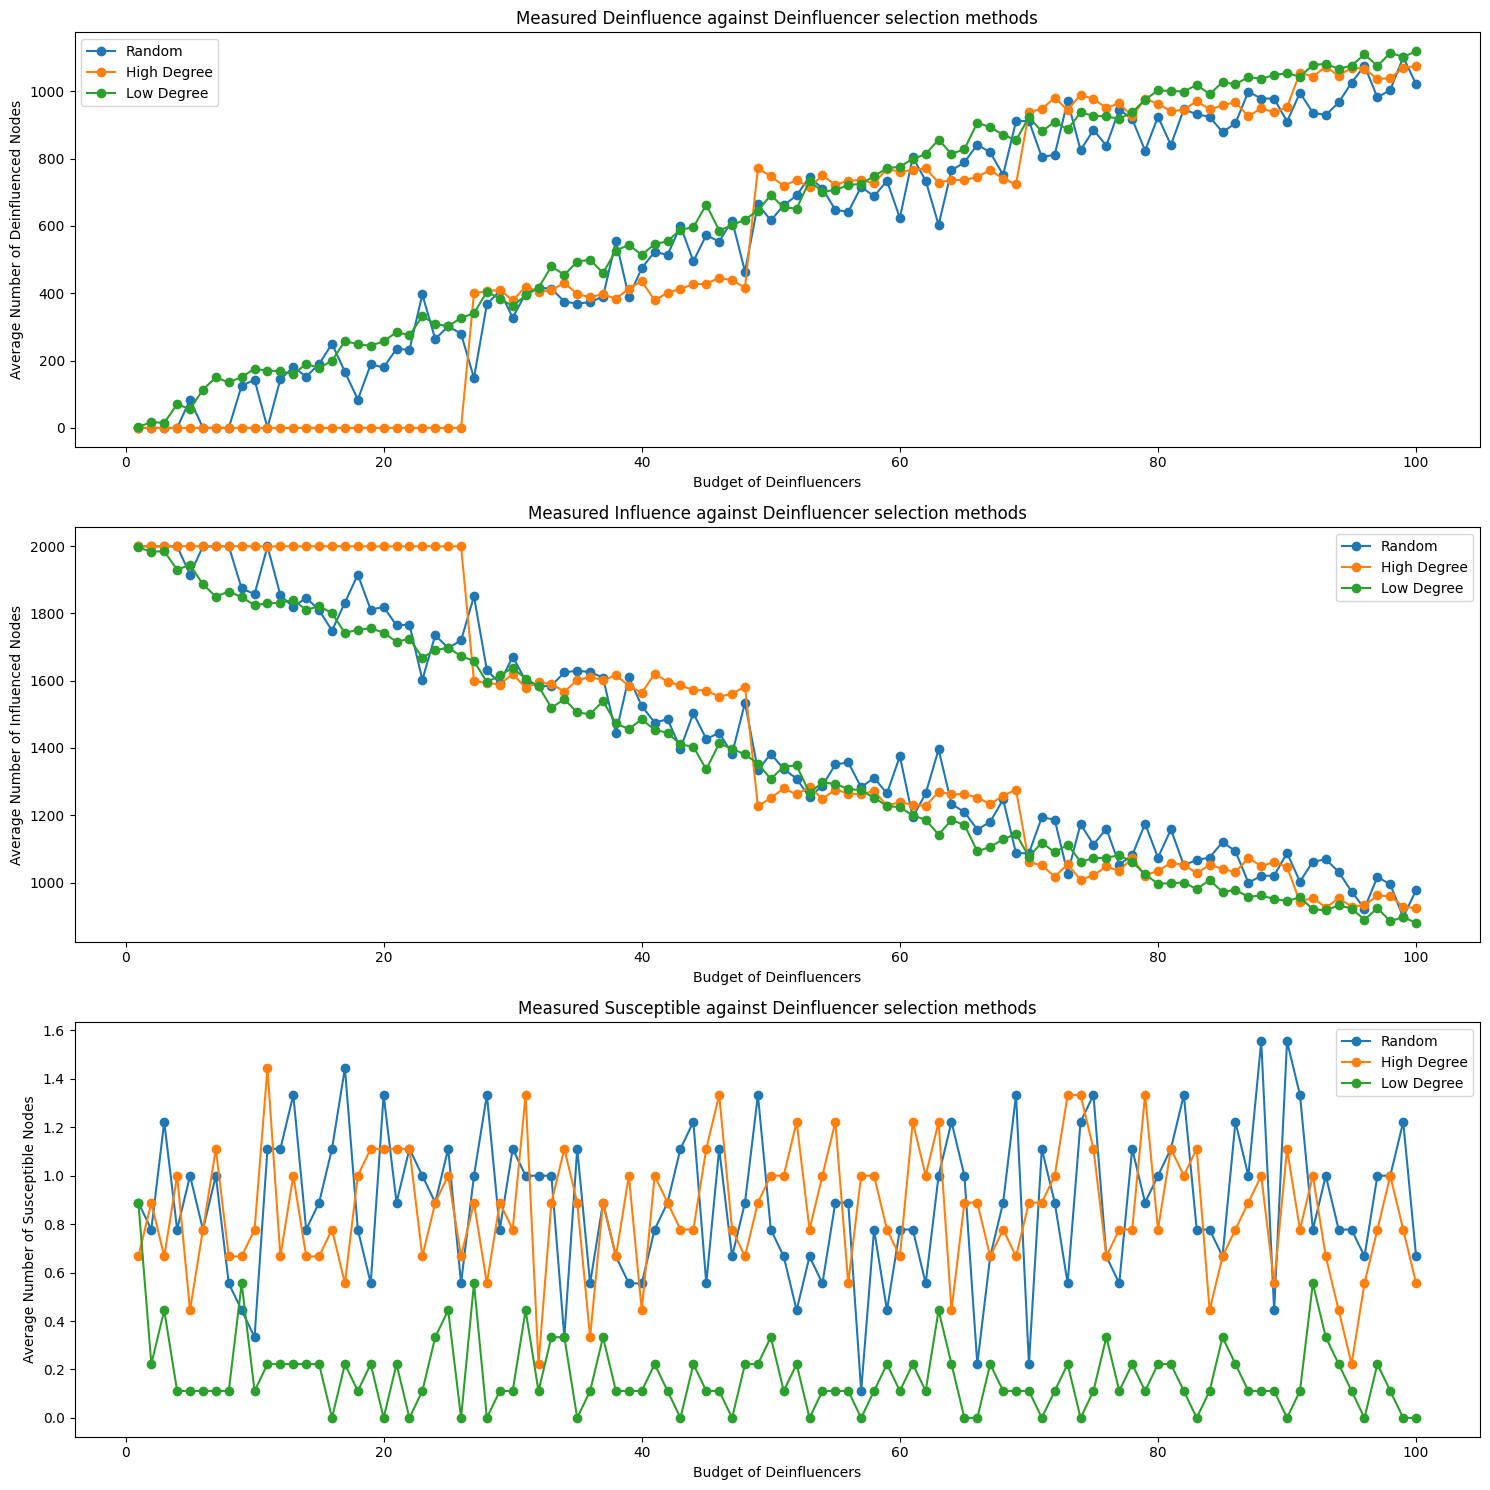

In [7]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [8]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': {557}, 'High Degree': {557}, 'Low Degree': {557}}), (2, {'Random': {1764}, 'High Degree': {6}, 'Low Degree': {557, 1102}}), (3, {'Random': {200}, 'High Degree': {12}, 'Low Degree': {557, 1102}}), (4, {'Random': {1412}, 'High Degree': {87}, 'Low Degree': {754, 557, 1102}}), (5, {'Random': {1331, 948}, 'High Degree': {428}, 'Low Degree': {754, 557, 1102, 783}}), (6, {'Random': {120, 401}, 'High Degree': {920}, 'Low Degree': {754, 557, 1102, 783}}), (7, {'Random': {80, 557, 791}, 'High Degree': {920, 108}, 'Low Degree': {557, 1102, 783, 754, 948}}), (8, {'Random': {1710, 1566}, 'High Degree': {920, 2}, 'Low Degree': {108, 557, 1102, 783, 754, 948}}), (9, {'Random': {651, 764, 527}, 'High Degree': {920, 17}, 'Low Degree': {108, 557, 1102, 783, 754, 948}}), (10, {'Random': {1719, 1324, 1671}, 'High Degree': {920, 428}, 'Low Degree': {108, 557, 1102, 783, 172, 754, 948}}), (11, {'Random': {948, 1757, 1582, 1775}, 'High Degree': {920, 428, 557}, 'Low Degree': {108, 557, 1102, 

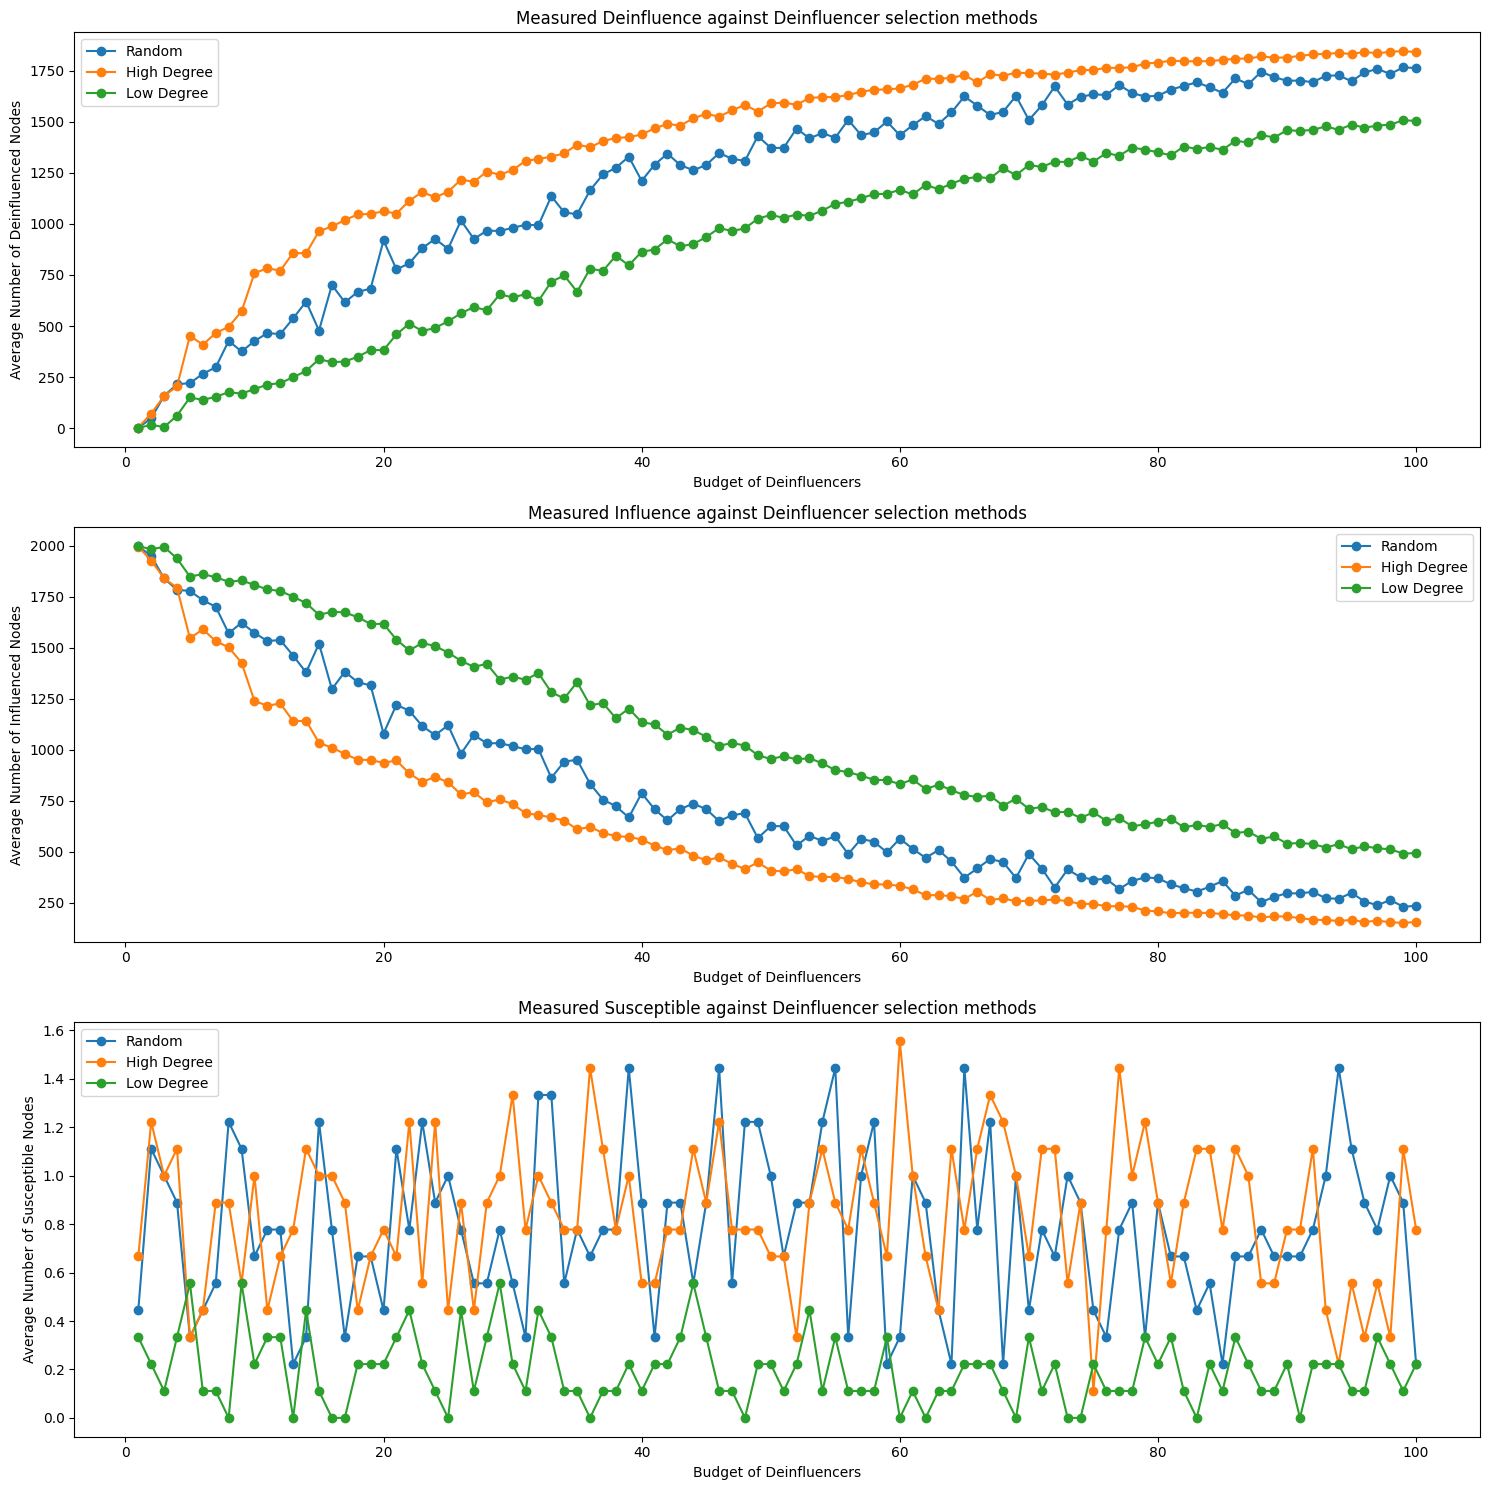

In [9]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [10]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': {1102}, 'High Degree': {557}, 'Low Degree': {557}}), (2, {'Random': {754}, 'High Degree': {754}, 'Low Degree': {557, 1102}}), (3, {'Random': {938}, 'High Degree': {108}, 'Low Degree': {557, 1102}}), (4, {'Random': {767}, 'High Degree': {6}, 'Low Degree': {754, 557, 1102}}), (5, {'Random': {1836}, 'High Degree': {9}, 'Low Degree': {754, 557, 1102}}), (6, {'Random': {625, 557}, 'High Degree': {38}, 'Low Degree': {754, 557, 1102, 783}}), (7, {'Random': {172, 1110}, 'High Degree': {2}, 'Low Degree': {754, 557, 1102, 783}}), (8, {'Random': {1707, 557}, 'High Degree': {16}, 'Low Degree': {557, 1102, 783, 754, 948}}), (9, {'Random': {594, 557}, 'High Degree': {12}, 'Low Degree': {557, 1102, 783, 754, 948}}), (10, {'Random': {1283, 1195}, 'High Degree': {0}, 'Low Degree': {557, 1102, 783, 754, 948}}), (11, {'Random': {1515, 783}, 'High Degree': {4}, 'Low Degree': {108, 557, 1102, 783, 754, 948}}), (12, {'Random': {948, 878, 767}, 'High Degree': {10}, 'Low Degree': {108, 557, 11

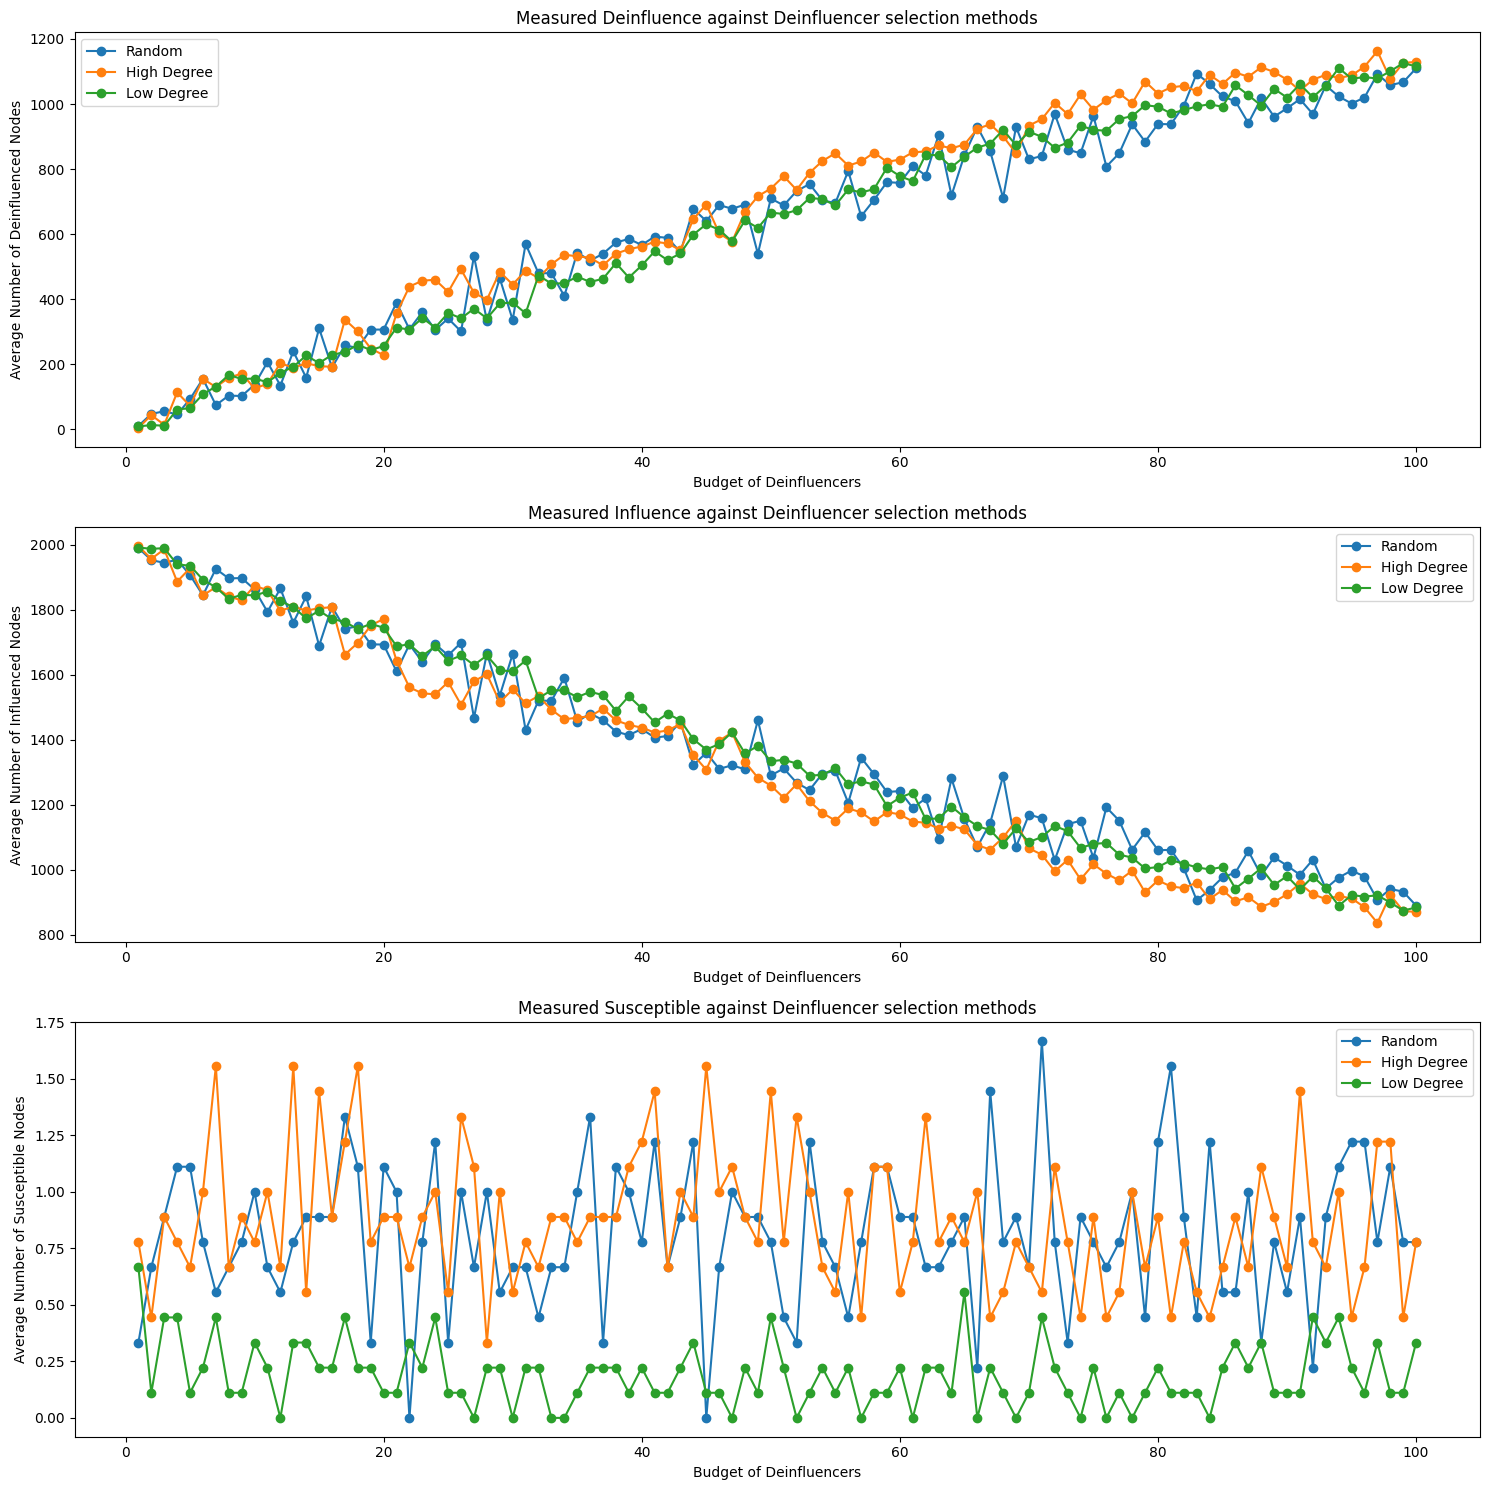

In [11]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()